In [1]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt
import altair_catplot as altcat

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

# Pevent bulky altair plots
alt.data_transformers.enable('json')

import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

Loading BokehJS ...

In [2]:
# Load the data into DataFrame df
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

In [3]:
df.head()

,location,activity,time,zeit,zeit_ind,day
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
2,3,0.0,2013-03-15 18:31:09,-14.480833,-869,4
3,4,0.0,2013-03-15 18:31:09,-14.480833,-869,4
4,5,0.0,2013-03-15 18:31:09,-14.480833,-869,4


In [4]:
dataframes = []
for i in range(1, 97):
    dataframes.append(df[df['location'] == i])


(to do multiple, sort by the location to make sure you are always considering the right fish)

array = [1, 2, 3, 4, .... ]

active_minutes_count = 0
for activity seconds in each one minute entry:
    if activity > 1:
        count +=1
    else:
        count = 0
        add this particular entry to the bucket
        

In [29]:
activity_array = []

for i, d in enumerate(dataframes):
    
    temp_array = [0] * d.shape[0]
    active_minutes_count = 0
    
    for index, row in d.iterrows():
        if row['activity'] > 1: # our fishy is still active
            active_minutes_count += 1
        else: # we have entered a period of inactivity
            temp_array[active_minutes_count] += 1
            active_minutes_count = 0
    activity_array.append(temp_array)

len(activity_array[0])

5363

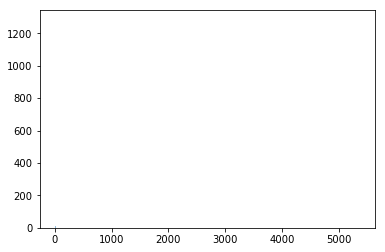

In [8]:
plt.bar(range(len(activity_array[0])), activity_array[0], align='center', alpha=0.5)
plt.show()

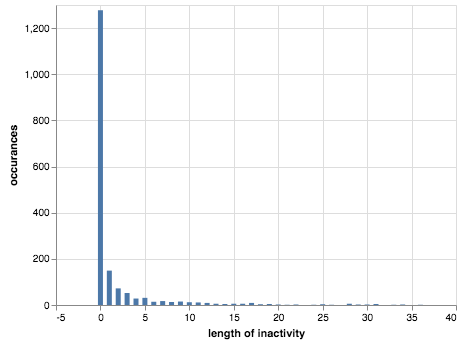

In [49]:
alt.renderers.enable('default')
x = range(40) #range(1, len(activity_array[0]) + 1)
x = pd.Series(x)
x.index = x

y = activity_array[0][:40]
y = pd.Series(y)
y.index = x

new_df = pd.DataFrame({"length of inactivity" : x, "occurances" : y})

alt.Chart(new_df).mark_bar().encode(
#     x = 'length of inactivity',
#     y = 'occurances',
    alt.X('length of inactivity:Q', scale=alt.Scale(rangeStep=10)),
    alt.Y('occurances:Q')
).interactive()